# Analysing the Edinburgh Fringe Festival Jokes

**This is the ipython notebook that revisits the blog post: [Python, natural language processing and predicting funny](http://vknight.org/unpeudemath/code/2015/06/14/natural-language-and-predicting-funny/)**.

I am updating the data to include the jokes from [2015](http://www.bbc.co.uk/news/uk-scotland-edinburgh-east-fife-34039927).

Here are the libraries we are going to need:

In [6]:
import pandas  # To handle our data nicely
import nltk  # For all the clever stuff

## Loading and tidying the data

In [43]:
import csv
df = pandas.read_csv('jokes.csv', quotechar='"', skipinitialspace=True) #

In [44]:
df.head()

,Year,Author,Rank,Raw_joke
0,2015,Darren Walsh,1,I just deleted all the German names off my pho...
1,2015,Stewart Francis,2,Kim Kardashian is saddled with a huge arse ......
2,2015,Adam Hess,3,Surely every car is a people carrier?
3,2015,Masai Graham,4,What's the difference between a 'hippo' and a ...
4,2015,Dave Green,5,If I could take just one thing to a desert isl...


In [45]:
df.tail()

,Year,Author,Rank,Raw_joke
65,2009,Adam Hills,6,Going to Starbucks for coffee is like going to...
66,2009,Marcus Brigstocke,7,To the people who've got iPhones: you just bou...
67,2009,Rhod Gilbert,8,"A spa hotel? It's like a normal hotel, only in..."
68,2009,Dan Antopolski,9,I've been reading the news about there being a...
69,2009,Simon Brodkin,10,I started so many fights at my school - I had ...


Getting rid of the common word and tokenising the jokes

In [46]:
# nltk.download()  # Only do this once: needed to download the `stopwords` corpus

In [47]:
commonwords = [e.upper() for e in set(nltk.corpus.stopwords.words('english'))] # <- Need to download the corpus: import nltk; nltk.download()
commonwords.extend(['M', 'VE'])
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')  # To be able to strip out unwanted things in strings
string_to_list = lambda x: [el.upper() for el in tokenizer.tokenize(x) if el.upper() not in commonwords]
df['Joke'] = df['Raw_joke'].apply(string_to_list)

In [48]:
df.head()

,Year,Author,Rank,Raw_joke,Joke
0,2015,Darren Walsh,1,I just deleted all the German names off my pho...,"[DELETED, GERMAN, NAMES, PHONE, HANS, FREE]"
1,2015,Stewart Francis,2,Kim Kardashian is saddled with a huge arse ......,"[KIM, KARDASHIAN, SADDLED, HUGE, ARSE, ENOUGH,..."
2,2015,Adam Hess,3,Surely every car is a people carrier?,"[SURELY, EVERY, CAR, PEOPLE, CARRIER]"
3,2015,Masai Graham,4,What's the difference between a 'hippo' and a ...,"[DIFFERENCE, HIPPO, ZIPPO, ONE, REALLY, HEAVY,..."
4,2015,Dave Green,5,If I could take just one thing to a desert isl...,"[COULD, TAKE, ONE, THING, DESERT, ISLAND, PROB..."


## Training our classifier

**From here on in we use the jokes up until 2013 as the training set.**

We start by getting the entire set of words in all the jokes from the training set.

In [50]:
df['Year'] = df['Year'].apply(int)

def get_all_words(dataframe):
    """
    A function that gets all the words from the Joke column in a given dataframe
    """
    all_words = []
    for jk in dataframe['Joke']:
        all_words.extend(jk)
    return all_words

all_words = get_all_words(df[df['Year'] <= 2014])
all_words[:10]  # The first ten words in our training data set

['DECIDED',
 'SELL',
 'HOOVER',
 'WELL',
 'COLLECTING',
 'DUST',
 'WRITTEN',
 'JOKE',
 'FAT',
 'BADGER']

Creating a function to extract features from a given joke

In [51]:
def extract_features(joke, all_words):
    words = set(joke)
    features = {}
    for word in words:
        features['contains(%s)' % word] = (word in all_words)
    return features

In [54]:
df['Features'] = df['Joke'].apply(lambda x:extract_features(x, get_all_words(df[df['Year'] <= 2014])))
df.head()

,Year,Author,Rank,Raw_joke,Joke,Features,Funny
0,2015,Darren Walsh,1,I just deleted all the German names off my pho...,"[DELETED, GERMAN, NAMES, PHONE, HANS, FREE]","{u'contains(DELETED)': False, u'contains(PHONE...",True
1,2015,Stewart Francis,2,Kim Kardashian is saddled with a huge arse ......,"[KIM, KARDASHIAN, SADDLED, HUGE, ARSE, ENOUGH,...","{u'contains(ENOUGH)': False, u'contains(KANYE)...",True
2,2015,Adam Hess,3,Surely every car is a people carrier?,"[SURELY, EVERY, CAR, PEOPLE, CARRIER]","{u'contains(EVERY)': False, u'contains(PEOPLE)...",True
3,2015,Masai Graham,4,What's the difference between a 'hippo' and a ...,"[DIFFERENCE, HIPPO, ZIPPO, ONE, REALLY, HEAVY,...","{u'contains(DIFFERENCE)': False, u'contains(HI...",True
4,2015,Dave Green,5,If I could take just one thing to a desert isl...,"[COULD, TAKE, ONE, THING, DESERT, ISLAND, PROB...","{u'contains(THING)': True, u'contains(WOULDN)'...",True


Labelling our jokes depending on what will be deemed as funny

In [55]:
funny_threshold = 5
df['Rank'] = df['Rank'].apply(int)
df['Funny'] = df['Rank'] <= funny_threshold
df.head(10)

,Year,Author,Rank,Raw_joke,Joke,Features,Funny
0,2015,Darren Walsh,1,I just deleted all the German names off my pho...,"[DELETED, GERMAN, NAMES, PHONE, HANS, FREE]","{u'contains(DELETED)': False, u'contains(PHONE...",True
1,2015,Stewart Francis,2,Kim Kardashian is saddled with a huge arse ......,"[KIM, KARDASHIAN, SADDLED, HUGE, ARSE, ENOUGH,...","{u'contains(ENOUGH)': False, u'contains(KANYE)...",True
2,2015,Adam Hess,3,Surely every car is a people carrier?,"[SURELY, EVERY, CAR, PEOPLE, CARRIER]","{u'contains(EVERY)': False, u'contains(PEOPLE)...",True
3,2015,Masai Graham,4,What's the difference between a 'hippo' and a ...,"[DIFFERENCE, HIPPO, ZIPPO, ONE, REALLY, HEAVY,...","{u'contains(DIFFERENCE)': False, u'contains(HI...",True
4,2015,Dave Green,5,If I could take just one thing to a desert isl...,"[COULD, TAKE, ONE, THING, DESERT, ISLAND, PROB...","{u'contains(THING)': True, u'contains(WOULDN)'...",True
5,2015,Mark Nelson,6,"Jesus fed 5,000 people with two fishes and a l...","[JESUS, FED, 5, 000, PEOPLE, TWO, FISHES, LOAF...","{u'contains(5)': False, u'contains(PEOPLE)': T...",False
6,2015,Tom Parry,7,Red sky at night. Shepherd's delight. Blue sky...,"[RED, SKY, NIGHT, SHEPHERD, DELIGHT, BLUE, SKY...","{u'contains(BLUE)': False, u'contains(DAY)': T...",False
7,2015,Alun Cochrane,8,"The first time I met my wife, I knew she was a...","[FIRST, TIME, MET, WIFE, KNEW, KEEPER, WEARING...","{u'contains(KNEW)': False, u'contains(MASSIVE)...",False
8,2015,Simon Munnery,9,Clowns divorce. Custardy battle,"[CLOWNS, DIVORCE, CUSTARDY, BATTLE]","{u'contains(BATTLE)': False, u'contains(CUSTAR...",False
9,2015,Grace The Child,10,They're always telling me to live my dreams. B...,"[RE, ALWAYS, TELLING, LIVE, DREAMS, WANT, NAKE...","{u'contains(DREAMS)': False, u'contains(LIVE)'...",False


Creating a labeled feature

In [56]:
df['Labeled_Feature'] = zip(df['Features'],df['Funny'])
df.head()

,Year,Author,Rank,Raw_joke,Joke,Features,Funny,Labeled_Feature
0,2015,Darren Walsh,1,I just deleted all the German names off my pho...,"[DELETED, GERMAN, NAMES, PHONE, HANS, FREE]","{u'contains(DELETED)': False, u'contains(PHONE...",True,"({u'contains(DELETED)': False, u'contains(PHON..."
1,2015,Stewart Francis,2,Kim Kardashian is saddled with a huge arse ......,"[KIM, KARDASHIAN, SADDLED, HUGE, ARSE, ENOUGH,...","{u'contains(ENOUGH)': False, u'contains(KANYE)...",True,"({u'contains(ENOUGH)': False, u'contains(KANYE..."
2,2015,Adam Hess,3,Surely every car is a people carrier?,"[SURELY, EVERY, CAR, PEOPLE, CARRIER]","{u'contains(EVERY)': False, u'contains(PEOPLE)...",True,"({u'contains(EVERY)': False, u'contains(PEOPLE..."
3,2015,Masai Graham,4,What's the difference between a 'hippo' and a ...,"[DIFFERENCE, HIPPO, ZIPPO, ONE, REALLY, HEAVY,...","{u'contains(DIFFERENCE)': False, u'contains(HI...",True,"({u'contains(DIFFERENCE)': False, u'contains(H..."
4,2015,Dave Green,5,If I could take just one thing to a desert isl...,"[COULD, TAKE, ONE, THING, DESERT, ISLAND, PROB...","{u'contains(THING)': True, u'contains(WOULDN)'...",True,"({u'contains(THING)': True, u'contains(WOULDN)..."


Creating our classifier

In [57]:
classifier = nltk.NaiveBayesClassifier.train(df[df['Year'] <= 2014]['Labeled_Feature'])

In [58]:
classifier.show_most_informative_features(10)

Most Informative Features
           contains(GOT) = True            False : True   =      2.5 : 1.0
          contains(WELL) = True            False : True   =      2.5 : 1.0
           contains(SAY) = True             True : False  =      2.2 : 1.0
        contains(PEOPLE) = True            False : True   =      1.8 : 1.0
          contains(DIDN) = True            False : True   =      1.8 : 1.0
          contains(MADE) = True            False : True   =      1.8 : 1.0
           contains(SEX) = True            False : True   =      1.8 : 1.0
         contains(NEVER) = True            False : True   =      1.8 : 1.0
          contains(KNOW) = True             True : False  =      1.7 : 1.0
            contains(RE) = True             True : False  =      1.6 : 1.0


In [59]:
joke = 'Why was 10 afraid of 7? Because 7 8 9'
classifier.classify(extract_features(string_to_list(joke), get_all_words(df[df['Year'] <= 2013])))

True

In [60]:
joke = 'Your mother is ...'
classifier.classify(extract_features(string_to_list(joke), get_all_words(df[df['Year'] <= 2013])))

False

The real test comes from applying our classifier to [this year's jokes](http://www.bbc.co.uk/news/uk-scotland-edinburgh-east-fife-28838287)

In [61]:
df['Prediction'] = df['Features'].apply(classifier.classify)
df[df['Year'] == 2015][['Raw_joke','Funny','Prediction']]

,Raw_joke,Funny,Prediction
0,I just deleted all the German names off my pho...,True,False
1,Kim Kardashian is saddled with a huge arse ......,True,True
2,Surely every car is a people carrier?,True,True
3,What's the difference between a 'hippo' and a ...,True,True
4,If I could take just one thing to a desert isl...,True,True
5,"Jesus fed 5,000 people with two fishes and a l...",False,True
6,Red sky at night. Shepherd's delight. Blue sky...,False,True
7,"The first time I met my wife, I knew she was a...",False,False
8,Clowns divorce. Custardy battle,False,True
9,They're always telling me to live my dreams. B...,False,False


In [63]:
sum(df[df['Year'] == 2015]['Prediction'] == df[df['Year'] == 2015]['Funny']) / float(len(df[df['Year'] == 2015]))

0.59999999999999998

## Wrapping all of the above in a function to see if we can identify how our classifier performs based on a funniness threshold

In [65]:
def accuracy(funny_threshold):
    """
    A function to return the accuracy of our predictor
    """
    df['Funny'] = df['Rank'] <= funny_threshold  # Changing the threshold
    df['Labeled_Feature'] = zip(df['Features'], df['Funny'])  # Re create labeled features
    classifier = nltk.NaiveBayesClassifier.train(df[df['Year'] <= 2013]['Labeled_Feature'])  # Train classifier
    df['Prediction'] = df['Features'].apply(classifier.classify)  # Apply classifier
    return sum(df[df['Year'] == 2015]['Prediction'] == df[df['Year'] == 2015]['Funny']) / float(len(df[df['Year'] == 2015]))

In [66]:
import seaborn as sns  # Making our plots look nicer easier (seaborn does a lot more: check it out)
import matplotlib.pyplot as plt  # Plots
%matplotlib inline

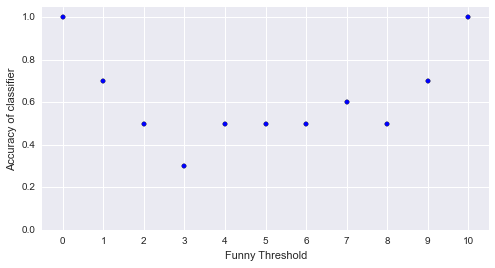

In [67]:
x = range(0, 11)
y = [accuracy(n) for n in x]

sns.set_style("darkgrid")
sns.set_context(rc={"figure.figsize": (8, 4)})

fig = plt.figure()
plt.scatter(x, y)
plt.xlabel('Funny Threshold')
plt.ylabel('Accuracy of classifier')
sns.plt.ylim(0,1.05)
sns.plt.xlim(min(x) - .5, max(x) + .5)
plt.xticks(x)
sns.despine()

## Wrapping everything in another function to see the effect of the testing data set

We used previous years to train for this year. Here we will just use random samples of a variety of size of the data to train.

In [68]:
import random

In [69]:
def accuracy(ratio_of_data=.8, funny_threshold=5):
    """
    A function to return the accuracy of our predictor based on 
    the percentage of rows and threshold of funniness used as a training set
    """
    n = max(1, min(int(ratio_of_data * len(df)), len(df) - 1))  # Makes sure we don't have a stupid number of rows
    df['Funny'] = df['Rank'] <= funny_threshold  # Threshold funniness

    training_rows = random.sample(df.index, n)  # Identify the rows used for the training
    all_words = get_all_words(df.ix[training_rows])  # Identify all the words
    df['Features'] = df['Joke'].apply(lambda x:extract_features(x, all_words))  # Extract the features
    df['Labeled_Feature'] = zip(df['Features'],df['Funny'])  # Re create labeled features
    
    classifier = nltk.NaiveBayesClassifier.train(df.ix[training_rows]['Labeled_Feature'])  # Train classifier
    df['Prediction'] = df['Features'].apply(classifier.classify)  # Apply classifier
    return sum(df.drop(training_rows)['Prediction'] == df.drop(training_rows)['Funny']) / float((len(df) - n))

Here is a plot of the accuracy for varying ratio.

In [73]:
def random_experiment_data(funny_threshold=5, number_of_steps=10, number_of_repetitions=20):
    """
    Use `funny_threshold` as the funny threshold.
    Repeat all this for a granularity given by `number_of_steps` and repeating each experiment `number_of_repetitions` times.
    """
    steps = [x / float(number_of_steps) for x in range(number_of_steps)]
    return [[accuracy(ratio_of_data=x, funny_threshold=funny_threshold) for x in steps] 
            for k in range(number_of_repetitions)], steps

In [74]:
def plot(funny_threshold=5, number_of_steps=10, number_of_repetitions=20, color='blue'):
    data, steps = random_experiment_data(funny_threshold=funny_threshold, 
                                         number_of_steps=number_of_steps, 
                                         number_of_repetitions=number_of_repetitions)

    fig = plt.figure()
    sns.tsplot(data, steps, color=color)
    plt.xlabel('Ratio of data used for training (%s repetitions)' % number_of_repetitions)
    plt.ylabel('Accuracy')
    sns.plt.ylim(0,1)
    plt.title('Accuracy with funny threshold: %s ' % funny_threshold)
    plt.show()
    return data, steps

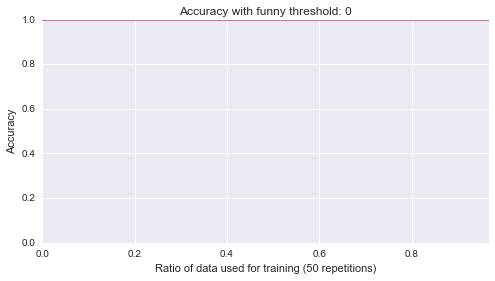

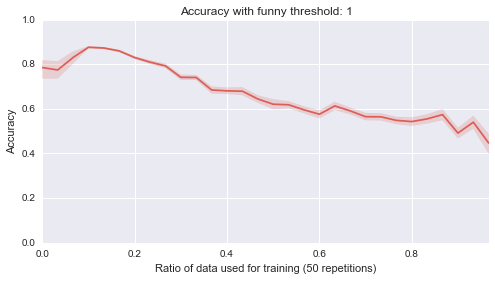

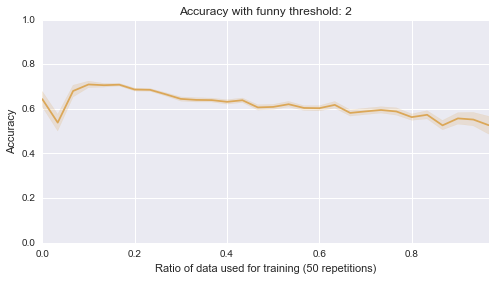

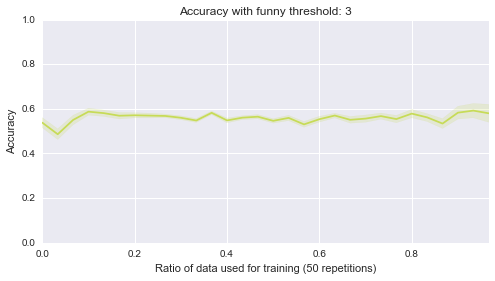

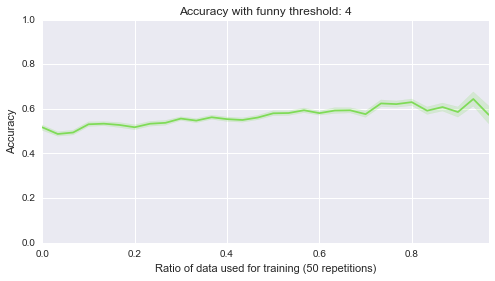

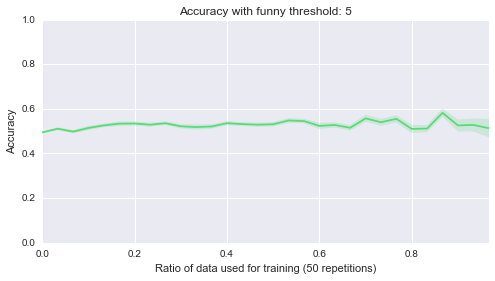

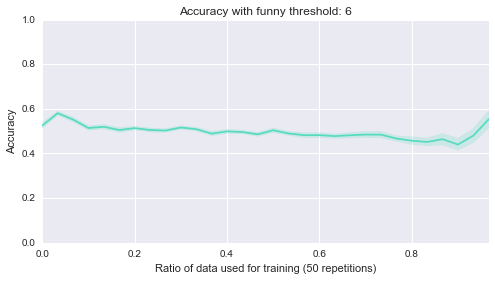

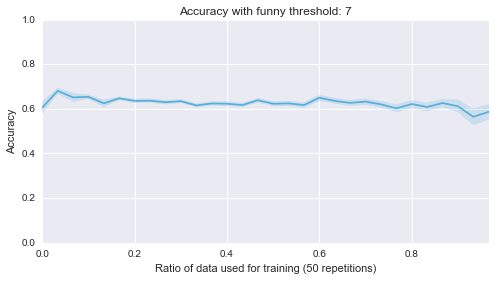

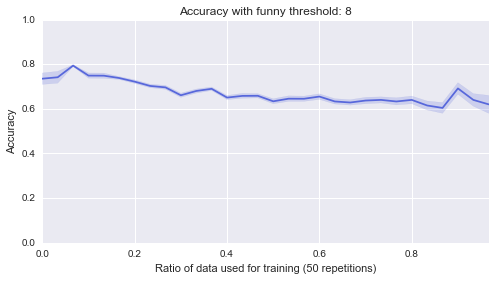

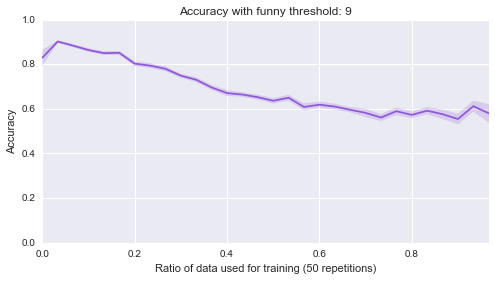

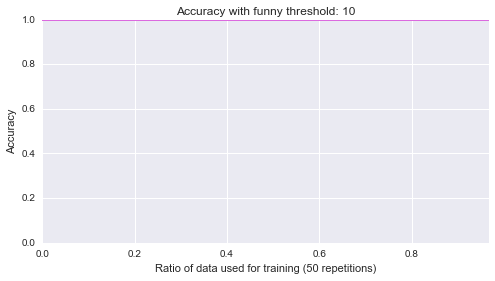

In [75]:
steps = 30
repetitions = 50
stacked_data = []
clrs = sns.color_palette("hls", 11)
for n in range(11):
    stacked_data.append(plot(funny_threshold=n, number_of_steps=steps, number_of_repetitions=repetitions, color=clrs[n - 1]))

Here are all the above on a single plot (not terrible helpful).

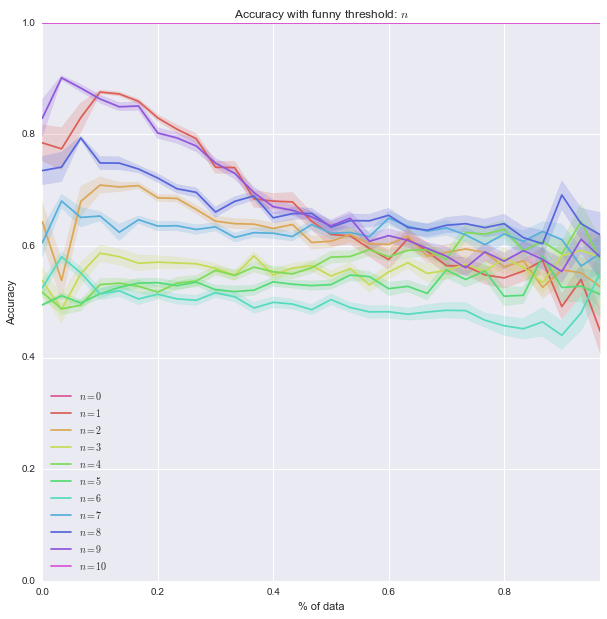

In [76]:
sns.set_context(rc={"figure.figsize": (10, 10)})
plt.figure()
for n in range(11):
    sns.tsplot(*stacked_data[n], color=clrs[n - 1], condition="$n=%s$" % (n))
    plt.xlabel('% of data')
    plt.ylabel('Accuracy')
    sns.plt.ylim(0,1)
    plt.title('Accuracy with funny threshold: $n$' )
plt.show()